In [240]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import pickle

import swimAD2 as ad2       # copy swimAD2.py to your working directory
import time

ad2.disconnect()            # close all instances before connecting
# zoroku = ad2.connect(0)      # connect to first(0th) ad2, give it the name 'zoroku'

### Code debugging

In [239]:
volt_in = 5
data = {}
data[volt_in] = {"rise": "Charging",
                 "fall": "Leakage"
                 }

def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        return size,hertz

# Measurements of the components. 
Res = 1000 # Resistance in Ohms.
Cap = 10e-6 # Capacitance in Fahrads.
threshold = 1e-4

tau = Res*Cap
t_wait = -tau*np.log(threshold) # Expected time to charge. 
discharge = t_wait*10

print("%5f s to charge, %5f s to discharge" % (t_wait,discharge))

t_wait = -Res*Cap*np.log(1e-6)

ad2.config_wavegen(zoroku, 
            frequency=0,
            amplitude=0,
            offset=volt_in
            )
ad2.start_wavegen(zoroku,channel=0)

size,rate = sampling(t_wait)

ad2.config_oscilloscope(zoroku,
    range0=.5,
    range1=.5,
    sample_rate = rate,
    sample_size= size,
    )
data[volt_in]["rise"] = ad2.measure_oscilloscope(zoroku)


size,rate = sampling(5)

ad2.config_oscilloscope(zoroku,
    range0=.05,
    range1=.05,
    sample_rate = rate,
    sample_size= size,
    )
t,v0,v1 = ad2.measure_oscilloscope(zoroku)
t += data[volt_in]["rise"][0][-1]+0.01
data[volt_in]["fall"] =  t,v0,v1

# Let the capacitor discharge.
time.sleep(discharge)

ad2.stop_wavegen(zoroku,channel=0)
ad2.reset_wavegen(zoroku,channel=0)

0.092103 s to charge, 0.921034 s to discharge
8192 59295.67326252398


KeyboardInterrupt: 

In [238]:
import ctypes as c

# Oscilloscope range test. 
def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        return size,hertz

volt_in = 3
data = [0.01,1,25]

# Measurements of the components. 
Res = 1000 # Resistance in Ohms.
Cap = 3.3e-6 # Capacitance in Fahrads.
threshold = 1e-4

tau = Res*Cap
t_wait = -tau*np.log(threshold) # Expected time to charge. 
discharge = t_wait*10

print("%5f s to charge, %5f s to discharge" % (t_wait,discharge))

for rng in data:
    ad2.config_wavegen(zoroku, 
                frequency=0,
                amplitude=0,
                offset=volt_in
                )
    ad2.start_wavegen(zoroku,channel=0)

    size,rate = sampling(t_wait)

    ad2.config_oscilloscope(zoroku,
        range0 = rng,
        range1 = rng,
        sample_rate = rate,
        sample_size = size,
        )
    t,v0,v1 = ad2.measure_oscilloscope(zoroku)

    vr2 = c.c_double()
    ad2.dwf.FDwfAnalogInChannelRangeGet(zoroku, c.c_int(1), c.byref(vr2))
    print(vr2.value)
    plt.scatter(t,v0,s=0.3,alpha=1,label="res")
    plt.scatter(t,v1,s=0.3,alpha=1,label="cap")

    ad2.stop_wavegen(zoroku,channel=0)
    ad2.reset_wavegen(zoroku,channel=0)
    time.sleep(discharge)

plt.legend(loc = "lower right")
plt.show()

0.030394 s to charge, 0.303941 s to discharge


KeyboardInterrupt: 

In [174]:
ad2.config_oscilloscope(zoroku,
        range0 = .25,
        range1 = 5.4,
        sample_rate = rate,
        sample_size = size,
        )

vr2 = c.c_double()
ad2.dwf.FDwfAnalogInChannelRangeGet(zoroku, c.c_int(1), c.byref(vr2))
print(vr2.value)

61.19741755291819


In [236]:
print("Leakage of: ", np.mean(data[volt_in]["fall"][1])/Res*1e3,"mA")
for region in ["rise","fall"]:
    t,v0,v1 = data[volt_in][region]
    plt.scatter(t,v0,
                color="orange",s=0.3,
                label=str(region)+" res"
                )
    plt.scatter(t,v1,
                color="blue",s=0.3,
                label=str(region)+" cap"
                )
    plt.axvline(x=t[-1])
    plt.axvline(x=Res*Cap)
    plt.xlim(0,t_wait)

# plt.axvline(x=t_wait,label="T")
plt.legend(loc="lower right")
plt.show

KeyError: 'fall'

### Actual experiment code set

In [96]:
# Create a DC current to charge the capacitor. 

# Measurements of the components. 
Res = 1000 # Resistance in Ohms.
Cap = 3.3e-6 # Capacitance in Fahrads.

volt_in = range(1,6)
n_trial = range(2)

input_dict = {}
for volt in volt_in: 
    input_dict[volt] = {}
    for trial in n_trial:
        trial = str(trial+1)+"th"
        input_dict[volt][trial] = {
                                    "rise": "Charging",
                                    "fall":"Leakage"
                                    }
print(input_dict)

{1: {'1th': {'rise': 'Charging', 'fall': 'Leakage'}, '2th': {'rise': 'Charging', 'fall': 'Leakage'}}, 2: {'1th': {'rise': 'Charging', 'fall': 'Leakage'}, '2th': {'rise': 'Charging', 'fall': 'Leakage'}}, 3: {'1th': {'rise': 'Charging', 'fall': 'Leakage'}, '2th': {'rise': 'Charging', 'fall': 'Leakage'}}, 4: {'1th': {'rise': 'Charging', 'fall': 'Leakage'}, '2th': {'rise': 'Charging', 'fall': 'Leakage'}}, 5: {'1th': {'rise': 'Charging', 'fall': 'Leakage'}, '2th': {'rise': 'Charging', 'fall': 'Leakage'}}}


In [175]:
def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        print(size,hertz)
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        print(size,hertz)
        return size,hertz
    
t_wait = -Res*Cap*np.log(1e-6) # Expected time to charge. 

volt_range = [5,25]

for volt in tqdm(input_dict.keys()):
    rng = volt_range[0] if volt<=2 else volt_range[1]
    for trial in n_trial:
        trial = str(trial+1)+"th"

        size,rate = sampling(t_wait)
        ad2.config_wavegen(zoroku, 
            frequency=0,
            amplitude=0,
            offset=volt
            )
        ad2.config_oscilloscope(zoroku,
            range0=.25,
            range1=rng,
            sample_rate = rate,
            sample_size= size,
            )
        
        ad2.start_wavegen(zoroku,channel=0)
        input_dict[volt][trial]["rise"] = ad2.measure_oscilloscope(zoroku)
        
        # We let the capacitor charge up
        time.sleep(30)
        
        size,rate = sampling(5)
        ad2.config_oscilloscope(zoroku,
            range0=.02,
            range1=.02,
            sample_rate = rate,
            sample_size= size,
            )
        
        t,v0,v1 = ad2.measure_oscilloscope(zoroku)
        t += t_wait
        input_dict[volt][trial]["fall"] =  t,v0,v1

        ad2.stop_wavegen(zoroku,channel=0)
        ad2.reset_wavegen(zoroku,channel=0)

        # We let the system completely discharge
        time.sleep(60*3)


  0%|          | 0/5 [00:00<?, ?it/s]

8192 179683.85837128482
8192 1638.4
8192 179683.85837128482
8192 1638.4


 20%|██        | 1/5 [07:10<28:40, 430.13s/it]

8192 179683.85837128482
8192 1638.4
8192 179683.85837128482
8192 1638.4


 40%|████      | 2/5 [14:20<21:30, 430.13s/it]

8192 179683.85837128482
8192 1638.4
8192 179683.85837128482
8192 1638.4


 60%|██████    | 3/5 [21:30<14:20, 430.13s/it]

8192 179683.85837128482
8192 1638.4
8192 179683.85837128482
8192 1638.4


 80%|████████  | 4/5 [28:40<07:10, 430.13s/it]

8192 179683.85837128482
8192 1638.4
8192 179683.85837128482
8192 1638.4


100%|██████████| 5/5 [35:50<00:00, 430.13s/it]


In [194]:
handle = open("rc-practice.pkl", 'wb')
pickle.dump(input_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

### Data analysis, here

Leakage of -0.001592 mA at 1
Initial voltages: 
 capacitor -0.320793 
 resistor -0.493189 
Leakage of -0.005437 mA at 2
Initial voltages: 
 capacitor -0.567377 
 resistor -0.987124 
Leakage of -0.005611 mA at 3
Initial voltages: 
 capacitor -0.996037 
 resistor -1.436774 
Leakage of -0.007431 mA at 4
Initial voltages: 
 capacitor -1.287382 
 resistor -1.915720 
Leakage of -0.009115 mA at 5
Initial voltages: 
 capacitor -1.739341 
 resistor -2.350042 


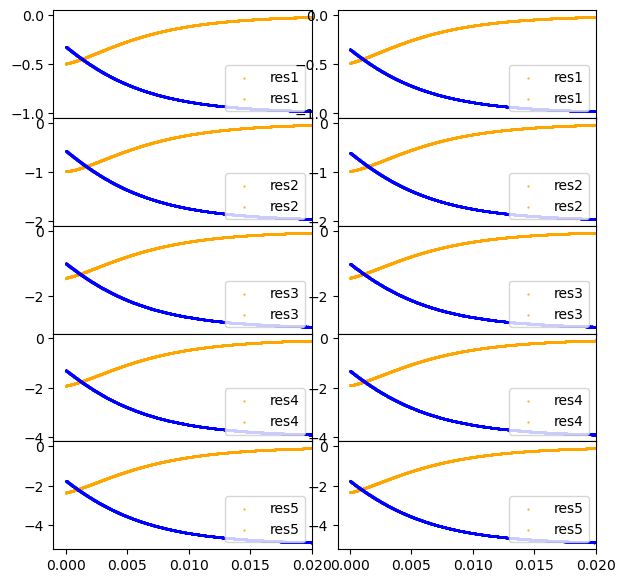

In [196]:
handle = open("rc-practice.pkl", 'rb')
pickle.load(handle)
handle.close()

n_volt = input_dict.keys()
for volt in n_volt:
    trial = list(input_dict[volt].keys())[0]
    t,v0,v1 = input_dict[volt][trial]["fall"]
    print("Leakage of %5f mA at %d" % (np.mean(v0)/Res*1e3, volt))

    t,v0,v1 = input_dict[volt][trial]["rise"]
    print("Initial voltages: \n capacitor %5f \n resistor %5f " % (v1[0],v0[0]))
    # print("Equilibrium voltage : ", np.mean(v1),"V \n")

fig, axes = plt.subplots(
                        len(n_volt),len(n_trial),
                        figsize=(7,7),sharex=True
                        )
fig.subplots_adjust(hspace=0,wspace=0.1)

for i,volt in enumerate(n_volt):
    ax = axes[i]
    n_trial = input_dict[volt].keys()
    for j,trial in enumerate(n_trial):
        for region in ["rise","fall"]:
            t,v0,v1 = input_dict[volt][trial][region]
            ax[j].scatter(t,v0,
                              color="orange",s=0.3,
                              label="res"+str(volt)
                              )
            ax[j].scatter(t,v1,
                              color="blue",s=0.3
                              )
            ax[j].axvline(x=t_wait)
            ax[j].set_xlim(0,t_wait+0.02)
            ax[j].legend(loc="lower right")


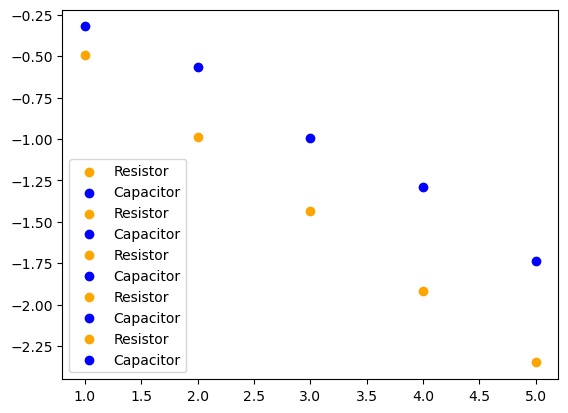

In [201]:
n_volt = input_dict.keys()
for volt in n_volt:
    trial = list(input_dict[volt].keys())[0]
    t,v0,v1 = input_dict[volt][trial]["fall"]
    # print("Leakage of %5f mA at %d" % (np.mean(v0)/Res*1e3, volt))

    t,v0,v1 = input_dict[volt][trial]["rise"]
    # print("Initial voltages: \n capacitor %5f \n resistor %5f " % (v1[0],v0[0]))
    # print("Equilibrium voltage : ", np.mean(v1),"V \n")

    plt.scatter(volt,v0[0],color="orange",label="Resistor")
    plt.scatter(volt,v1[0],color="blue",label="Capacitor")

plt.legend(loc="lower left")

C:\Users\chwan\AppData\Local\Temp\ipykernel_15540\2499831275.py:4: RuntimeWarning: overflow encountered in exp
  return emf*(1-np.exp(-t/tau))


0.0019684511683957366 5.94515741118059e-07 0 0.01
0.0007328227698001935 0.8342980995397794
-0.9903851924321074 0.008430753860687347 1 0.01
-0.7099807455012832 0.011915916512242133
-1.9850381679669724 0.00909157635033292 2 0.01
-1.444040861590556 0.012357043683696382
-2.9635693045660574 0.008800029470463737 3 0.01
-2.128425607024102 0.012090564230629404
-3.955987566327278 0.009040363313936406 4 0.01
-2.8493250001429713 0.01225596533535385


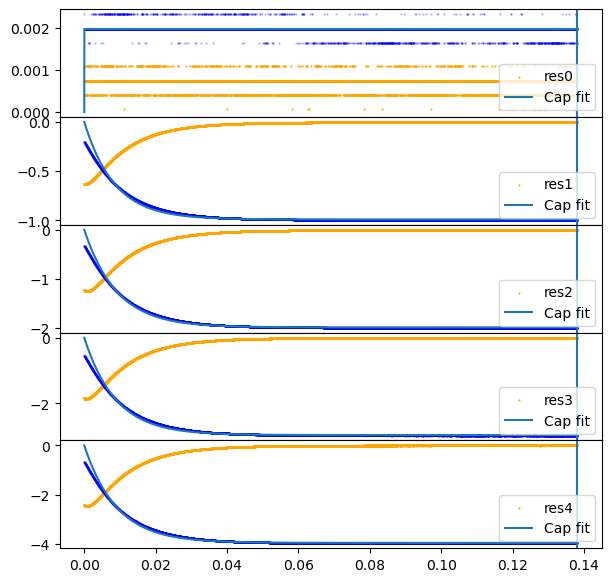

In [235]:
from scipy.optimize import curve_fit 

def voltage_cap(t,emf,tau):
    return emf*(1-np.exp(-t/tau))
def voltage_res(t,emf,tau):
    return emf*(np.exp(-t/tau))

handle = open("rc_leakage.pkl", 'rb')
data = pickle.load(handle)
handle.close()

n_volt = range(0,5)
n_trial = range(1)
fig, axes = plt.subplots(
                        len(n_volt),
                        figsize=(7,7),sharex=True
                        )
fig.subplots_adjust(hspace=0,wspace=0.1)

Res, Cap = data["res"],data["cap"]
tau = Res*Cap
t_wait = -tau*np.log(1e-6)

for i,volt in enumerate(n_volt):
    ax = axes
    n_trial = list(data[volt].keys())
    for j,trial in enumerate(n_trial):
        for region in ["rise"]:
            t,v0,v1 = data[volt][trial][region]
            ax[i].scatter(t,v0,
                              color="orange",s=0.3,
                              label="res"+str(volt)
                              )
            ax[i].scatter(t,v1,
                              alpha = 0.3, color="blue",s=0.3
                              )
            if region == "rise":
                popt,_ = curve_fit(voltage_cap,t,v1,p0 = [volt,tau])
                qopt,_ = curve_fit(voltage_res,t,v0,p0 = [volt,tau])
                print(popt[0],popt[1],volt,tau)
                ax[i].plot(t,voltage_cap(t,popt[0],popt[1]),
                            label="Cap fit"
                            )
                print(qopt[0],qopt[1])
                # ax[i].plot(t,voltage_res(t,qopt[0],qopt[1]),
                #             color="red",label="Res fit"
                #             )
            ax[i].axvline(x=t_wait)
            # ax[i].set_xlim(0,t_wait+0.02)
            ax[i].legend(loc="lower right")